<a href="https://colab.research.google.com/github/aviscki/GritSearch-Kfold/blob/main/Grit_Search_%2B_Kfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# 1. Carregando a base de dados
wine = load_wine()
X = wine.data
y = wine.target

# 2. Separando em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
# 3. GridSearch para KNN
param_grid_knn = {'n_neighbors': range(1, 21)}
gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=4)
gs_knn.fit(X_train, y_train)

best_knn = gs_knn.best_estimator_

In [13]:
# 4. GridSearch para Árvore de Decisão
param_grid_tree = {
    'max_depth': range(1, 11),
    'criterion': ['gini', 'entropy']
}
gs_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=4)
gs_tree.fit(X_train, y_train)

best_tree = gs_tree.best_estimator_

In [14]:
# 5. Avaliação com KFold = 4
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

knn_scores = cross_val_score(best_knn, X, y, cv=kfold)
tree_scores = cross_val_score(best_tree, X, y, cv=kfold)

In [15]:
# 6. Resultados e comparação
print("Melhores parâmetros para KNN:", gs_knn.best_params_)
print("Melhores parâmetros para Árvore de Decisão:", gs_tree.best_params_)

print("\nAcurácias com KFold (KNN):", knn_scores)
print("Média de acurácia KNN:", np.mean(knn_scores))

print("\nAcurácias com KFold (Árvore de Decisão):", tree_scores)
print("Média de acurácia Árvore de Decisão:", np.mean(tree_scores))

Melhores parâmetros para KNN: {'n_neighbors': 19}
Melhores parâmetros para Árvore de Decisão: {'criterion': 'entropy', 'max_depth': 3}

Acurácias com KFold (KNN): [0.75555556 0.71111111 0.59090909 0.70454545]
Média de acurácia KNN: 0.690530303030303

Acurácias com KFold (Árvore de Decisão): [0.88888889 0.93333333 0.79545455 0.84090909]
Média de acurácia Árvore de Decisão: 0.8646464646464647


In [16]:
# 7. Avaliação final no conjunto de teste
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

best_tree.fit(X_train, y_train)
y_pred_tree = best_tree.predict(X_test)

print("\nRelatório de Classificação - KNN:")
print(classification_report(y_test, y_pred_knn))

print("Relatório de Classificação - Árvore de Decisão:")
print(classification_report(y_test, y_pred_tree))


Relatório de Classificação - KNN:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.87      0.62      0.72        21
           2       0.50      0.73      0.59        15

    accuracy                           0.72        54
   macro avg       0.75      0.73      0.72        54
weighted avg       0.77      0.72      0.73        54

Relatório de Classificação - Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.90      0.86      0.88        21
           2       0.88      1.00      0.94        15

    accuracy                           0.91        54
   macro avg       0.91      0.92      0.91        54
weighted avg       0.91      0.91      0.91        54



In [19]:
# 8. Gráficos comparativos
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Comparação de Acurácia Média')

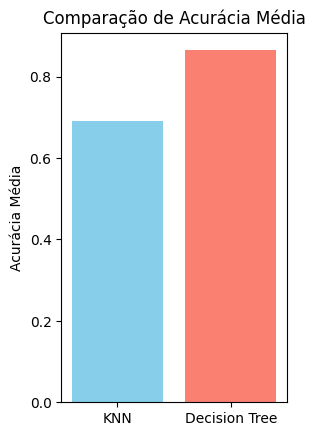

In [20]:
# Gráfico de barras da acurácia média
models = ['KNN', 'Decision Tree']
mean_scores = [np.mean(knn_scores), np.mean(tree_scores)]

plt.subplot(1, 2, 1)
plt.bar(models, mean_scores, color=['skyblue', 'salmon'])
plt.ylabel('Acurácia Média')
plt.title('Comparação de Acurácia Média')

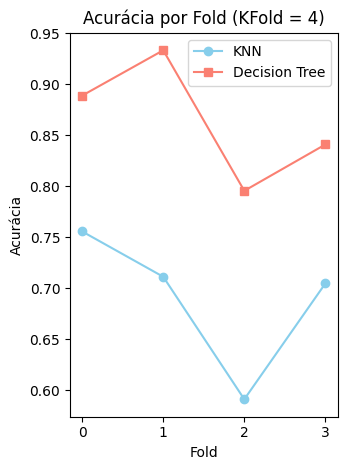

In [21]:
# Gráfico de linhas dos folds
plt.subplot(1, 2, 2)
plt.plot(knn_scores, marker='o', label='KNN', color='skyblue')
plt.plot(tree_scores, marker='s', label='Decision Tree', color='salmon')
plt.title('Acurácia por Fold (KFold = 4)')
plt.xlabel('Fold')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

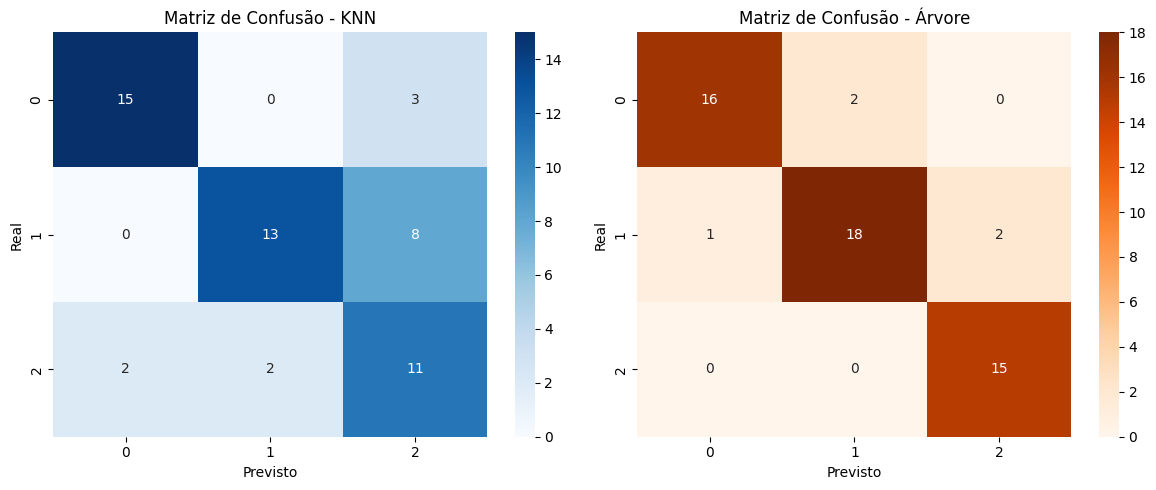

In [24]:
# 9. Matriz de confusão para cada modelo
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusão - KNN')
axes[0].set_xlabel('Previsto')
axes[0].set_ylabel('Real')

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Matriz de Confusão - Árvore')
axes[1].set_xlabel('Previsto')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()